In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import tensorflow as tf
import os
import datetime
import matplotlib.pyplot as plt

In [3]:
#import data into a pandas db
data = pd.read_csv('/content/wisconsin_bc_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
"""
plan to preprocess:
1. remove the last "unnamed_32" column and ID as they should be irrelevant
2. treat all other data to be relevant for now
2. separate diagnosis column, as that is the target variable
3. normalise the other columns
"""

In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
#separating the target variable, encode target
target = data.pop('diagnosis')

In [5]:
l = LabelEncoder()
target = l.fit_transform(target)

In [6]:
#removing unneeded columns
data = data.drop(['id','Unnamed: 32'], axis=1)

In [7]:
#splitting train/val/test and standardising the data
SEED = 820819

x_train, x_iter, y_train, y_iter = train_test_split(data, target, test_size=0.4, random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_iter, y_iter, test_size=0.5, random_state=SEED)

x_train_np = np.array(x_train)
x_test_np = np.array(x_test)

In [8]:
ss = StandardScaler()

ss.fit(x_train)
ss.transform(x_train)
ss.fit(x_val)
ss.fit(x_test)

StandardScaler()

In [9]:
#create the model
#since the target variable is between two options, malignant vs benign 
#I treat it as a binary classification problem

model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(x_train_np.shape[-1],)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])


In [10]:
base_log_path = r'/content/logs'
log_path = os.path.join(base_log_path, datetime.datetime.now().strftime("%Y%M%D - %H%M%S"))

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_path)
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=2)

EPOCHS = 30
BATCH_SIZE = 16

In [11]:
history = model.fit(x_train_np, y_train, validation_data=(x_val,y_val), 
                    batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[tb_callback, es_callback])

Epoch 1/30
22/22 [==============================] - 1s 13ms/step - loss: 7.8594 - accuracy: 0.4897 - val_loss: 0.3987 - val_accuracy: 0.8421
Epoch 2/30
22/22 [==============================] - 0s 3ms/step - loss: 1.4499 - accuracy: 0.7185 - val_loss: 0.3553 - val_accuracy: 0.9123
Epoch 3/30
22/22 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.7683 - val_loss: 0.2908 - val_accuracy: 0.8772
Epoch 4/30
22/22 [==============================] - 0s 4ms/step - loss: 0.4524 - accuracy: 0.8270 - val_loss: 0.2959 - val_accuracy: 0.8947
Epoch 5/30
22/22 [==============================] - 0s 4ms/step - loss: 0.4533 - accuracy: 0.7713 - val_loss: 0.3129 - val_accuracy: 0.8947
Epoch 6/30
22/22 [==============================] - 0s 3ms/step - loss: 0.3791 - accuracy: 0.8622 - val_loss: 0.2922 - val_accuracy: 0.8947
Epoch 7/30
22/22 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.7889 - val_loss: 0.2698 - val_accuracy: 0.8947
Epoch 8/30
22/22 [=

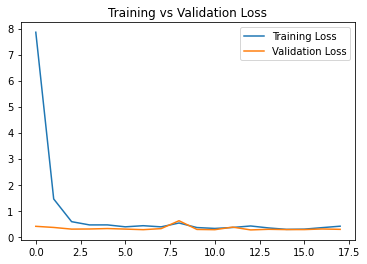

<Figure size 432x288 with 0 Axes>

In [13]:
#graphing model loss and accuracy over the training
training_loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = history.epoch

plt.plot(epoch, training_loss, label='Training Loss')
plt.plot(epoch, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.figure()
plt.show()

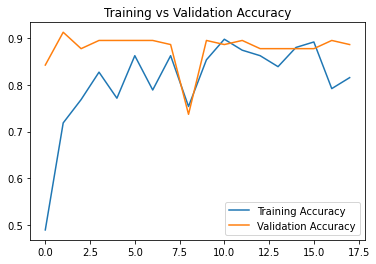

<Figure size 432x288 with 0 Axes>

In [15]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epoch, train_acc, label='Training Accuracy')
plt.plot(epoch, val_acc, label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

In [16]:
#evaluate on test set
test_result = model.evaluate(x_test, y_test, batch_size = BATCH_SIZE)
print(f"Test loss = {test_result[0]}")
print(f"Test accuracy = {test_result[1]}")

8/8 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.9211
Test loss = 0.21844953298568726
Test accuracy = 0.9210526347160339
